### Análise de Dados - Base de Dados retirada do site Maven Analytics contendo informações de vendas de filias de lojas de café nos EUA.
### Serão analisadas os seguintes indicadores:

- Receita Total de Vendas
- Quantidade Tota de Produto Vendido
- Ticket Médio de Vendas
- Receita Total de Loja por Região
- Receita Total por Categoria
- Volume Total de Vendas por Categoria
- Comparação de Volume de Vendas por Mês

In [17]:
# importanto as bibliotecas necessárias
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [18]:
# acessando a base de dados
df_vendas = pd.read_excel('Coffee Shop Sales.xlsx')

display(df_vendas)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [19]:
# tratando os dados
# excluindo colunas desnecessárias para a análise
df_vendas = df_vendas.drop(['transaction_id', 'transaction_time', 'store_id', 'product_id'], axis=1)

display(df_vendas)
df_vendas.info()


,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,2023-01-01,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...
149111,2023-06-30,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,2023-06-30,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,2023-06-30,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,2023-06-30,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_qty   149116 non-null  int64         
 2   store_location    149116 non-null  object        
 3   unit_price        149116 non-null  float64       
 4   product_category  149116 non-null  object        
 5   product_type      149116 non-null  object        
 6   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 8.0+ MB


In [20]:
# renomeando os nomes as colunas
df_vendas = df_vendas.rename(
    columns={'transaction_date':'Data da Venda', 'transaction_qty': 'Quantidade Vendida', 
             'store_location': 'Localização da Loja', 'unit_price': 'Preço Unitario',
             'product_category': 'Categoria do Produto', 'product_type': 'Tipo de Produto',
             'product_detail': 'Descrição do Produto'
             })
display(df_vendas)

,Data da Venda,Quantidade Vendida,Localização da Loja,Preço Unitario,Categoria do Produto,Tipo de Produto,Descrição do Produto
0,2023-01-01,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...
149111,2023-06-30,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,2023-06-30,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,2023-06-30,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,2023-06-30,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino


In [21]:
# transformando a coluna de Data da Venda em Mês da Venda e criando uma nova coluna chamada Receita Total (Qtd * Preço)
df_vendas["Data da Venda"] = df_vendas["Data da Venda"].dt.month_name()
df_vendas = df_vendas.rename(columns={'Data da Venda': 'Mês da Venda'})
df_vendas['Receita Total'] = df_vendas['Quantidade Vendida'] * df_vendas['Preço Unitario']


display(df_vendas)

,Mês da Venda,Quantidade Vendida,Localização da Loja,Preço Unitario,Categoria do Produto,Tipo de Produto,Descrição do Produto,Receita Total
0,January,2,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00
1,January,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
2,January,2,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00
3,January,1,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
4,January,2,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
...,...,...,...,...,...,...,...,...
149111,June,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00
149112,June,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00
149113,June,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00
149114,June,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino,3.75


### 1 - Qual foi a soma da Receita Total das Vendas segundo os dados? 

In [23]:
receita_total = df_vendas['Receita Total'].sum()

display(f'A receita total de vendas foi R$ {receita_total}')

'A receita total de vendas foi R$ 698812.3300000002'

### 2 - Qual foi Volume Total de Vendas segundos os dados?

In [ ]:
volume_total_vendas = df_vendas['Quantidade Vendida'].sum()

display(f'O volume total de vendas foi de {volume_total_vendas :,.0f} produtos vendidos')

'O volume total de vendas foi de 214,470 produtos vendidos'

### 3 - Qual foi Ticket Médio de Vendas segundo os dados?

In [29]:
ticket_medio = receita_total / volume_total_vendas

display(f'O ticket médio de vendas é de R$ {ticket_medio :,.2f}')

'O ticket médio de vendas é de R$ 3.26'

### 4 - Faça uma classificação da receita de loja por região, da loja que faturou mais para a que faturou menos?

In [35]:
regiao_mais_faturou = df_vendas[['Localização da Loja', 'Receita Total']].groupby('Localização da Loja').sum()
regiao_mais_faturou = regiao_mais_faturou.sort_values('Receita Total', ascending=False)

display(regiao_mais_faturou)


,Receita Total
Localização da Loja,
Hell's Kitchen,236511.17
Astoria,232243.91
Lower Manhattan,230057.25


### 5 - Qual foi a categoria de Produto que mais teve Receita e a categoria que mais teve Volume de vendas?

In [37]:
categoria_mais_faturou =  df_vendas[['Categoria do Produto', 'Receita Total']].groupby('Categoria do Produto').sum()
categoria_mais_faturou = categoria_mais_faturou.sort_values('Receita Total', ascending=False)


display(categoria_mais_faturou)
display(f'A categoria que mais faturou foi {categoria_mais_faturou.index[0]} com um valor de R$ {categoria_mais_faturou['Receita Total'][0]}')

,Receita Total
Categoria do Produto,
Coffee,269952.45
Tea,196405.95
Bakery,82315.64
Drinking Chocolate,72416.00
Coffee beans,40085.25
Branded,13607.00
Loose Tea,11213.60
Flavours,8408.80
Packaged Chocolate,4407.64


C:\Users\Elias Filho\AppData\Local\Temp\ipykernel_29932\3130873448.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'A categoria que mais faturou foi {categoria_mais_faturou.index[0]} com um valor de R$ {categoria_mais_faturou['Receita Total'][0]}')


'A categoria que mais faturou foi Coffee com um valor de R$ 269952.45'

In [39]:
categoria_mais_qtd_vendida =  df_vendas[['Categoria do Produto', 'Quantidade Vendida']].groupby('Categoria do Produto').sum()
categoria_mais_qtd_vendida = categoria_mais_qtd_vendida.sort_values('Quantidade Vendida', ascending=False)


display(categoria_mais_qtd_vendida)
display(f'A categoria que teve maior quantidade de venda foi o {categoria_mais_qtd_vendida.index[0]} com  {categoria_mais_qtd_vendida['Quantidade Vendida'][0]} produtos vendidos')

,Quantidade Vendida
Categoria do Produto,
Coffee,89250
Tea,69737
Bakery,23214
Drinking Chocolate,17457
Flavours,10511
Coffee beans,1828
Loose Tea,1210
Branded,776
Packaged Chocolate,487


C:\Users\Elias Filho\AppData\Local\Temp\ipykernel_29932\3450148212.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'A categoria que teve maior quantidade de venda foi o {categoria_mais_qtd_vendida.index[0]} com  {categoria_mais_qtd_vendida['Quantidade Vendida'][0]} produtos vendidos')


'A categoria que teve maior quantidade de venda foi o Coffee com  89250 produtos vendidos'

### 6 - Qual foi o Mês que teve o maior Volume de Vendas segundo os dados?

In [40]:
vendas_mês = df_vendas['Mês da Venda'].value_counts()
vendas_mês = vendas_mês.to_frame()

display(vendas_mês)

,count
Mês da Venda,
June,35352
May,33527
April,25335
March,21229
January,17314
February,16359


### 7 - Faça um Gráfico de Barras para demostrar volume das vendas de cada mês.

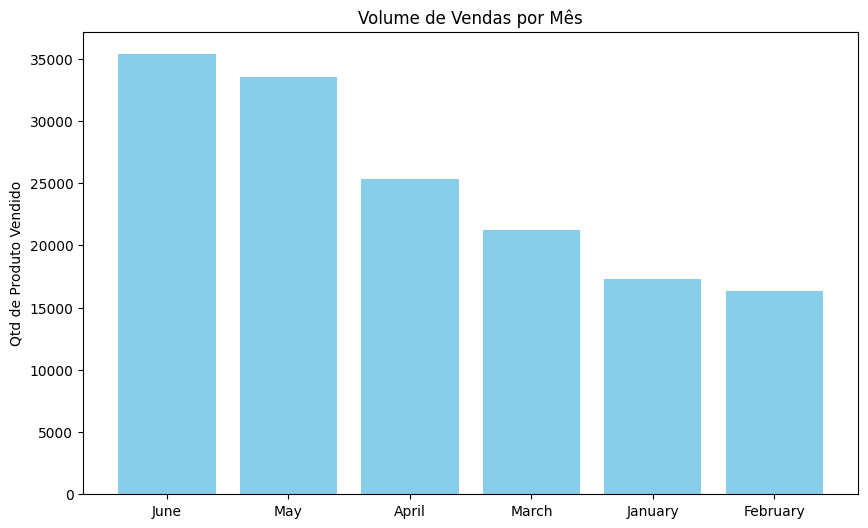

In [42]:
# grafico de barra horizontal
plt.figure(figsize=(10, 6))
plt.bar(vendas_mês.index, vendas_mês['count'], color='skyblue')
plt.ylabel('Qtd de Produto Vendido')
plt.title('Volume de Vendas por Mês')
plt.show()

### 8 - Agora faça um Gráfico de Pizza mostrando em porcentagem o quanto do valor da receita total cada loja representa.

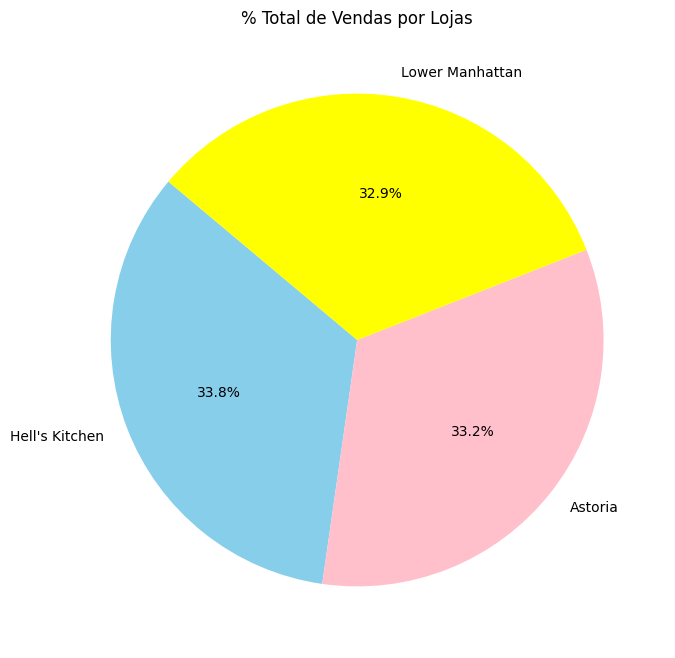

In [46]:
# grafico de pizza
plt.figure(figsize=(8, 8))
plt.pie(regiao_mais_faturou['Receita Total'], labels= regiao_mais_faturou.index, autopct='%1.1f%%', colors=['skyblue', 'pink', 'yellow'] , startangle=140)
plt.title('% Total de Vendas por Lojas')
plt.show()